# Régression linéaire 
## Mini brief projet 
### 1. Chargement de données 

In [1]:
import numpy as np 
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

dataset = fetch_california_housing()

X = dataset.data
y = dataset.target

sns.set_theme(style="white", font='JetBrains Mono', font_scale=0.8)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Préparation des données
#### Transformation de dataframe

In [2]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['PRICE'] = dataset.target
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

### Entrainement sur toutes les features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

### Evaluation du modèle

In [5]:
# train evaluate 
y_train_predict = clf.predict(X_train)

rmse = mean_squared_error(y_true=y_train, y_pred=y_train_predict)
mse = mean_squared_error(y_true=y_train, y_pred=y_train_predict, squared=True)
r2 = r2_score(y_true=y_train, y_pred=y_train_predict)

print(f'rmse:{rmse}, mse:{mse}, r2:{r2}')

rmse:0.5294891399923819, mse:0.5294891399923819, r2:0.6062503240886087


### Exploration de données
Pour choisir les variables d'entrée (features) on procède à une étude de corrélation 

<Axes: >

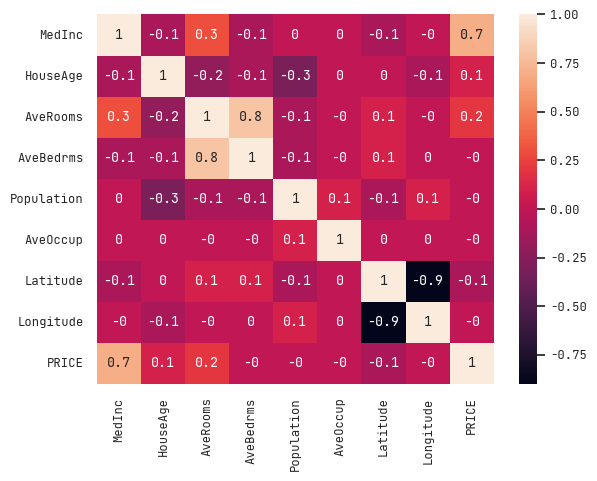

In [6]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

<Axes: >

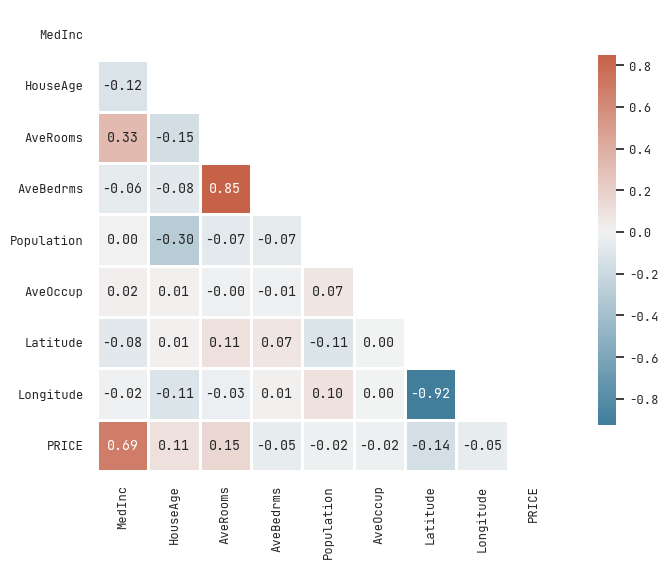

In [7]:
corr = df.corr()
 
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, fmt=f'.02f', linewidths=.8,cbar_kws={"shrink": .8},  annot=True)

> D'après la matrice de corrélation, nous lisons que `PRICE` est fortement corrélé avec `MedInc`.

### Modèle de régression linéaire

In [8]:
X_best = df[['MedInc', 'HouseAge', 'AveRooms']]
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, train_size=0.8)

clf = LinearRegression()
clf.fit(X_train_best, y_train_best)

X_best.head(5)

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


### Evaluation du modèle (`best_features`)

In [9]:
# train evaluate 
y_train_predict = clf.predict(X_train_best)

rmse = mean_squared_error(y_true=y_train_best, y_pred=y_train_predict)
mse = mean_squared_error(y_true=y_train_best, y_pred=y_train_predict, squared=True)
r2 = r2_score(y_true=y_train_best, y_pred=y_train_predict)

print(f'rmse:{rmse}, mse:{mse}, r2:{r2}')

rmse:0.6502680080125663, mse:0.6502680080125663, r2:0.5136251333633521


### Test de notre modèle 

In [10]:
# train evaluate 
y_test_predict = clf.predict(X_test_best)

rmse = mean_squared_error(y_true=y_test_best, y_pred=y_test_predict)
mse = mean_squared_error(y_true=y_test_best, y_pred=y_test_predict, squared=True)
r2 = r2_score(y_true=y_test_best, y_pred=y_test_predict)

print(f'rmse:{rmse}, mse:{mse}, r2:{r2}')

rmse:0.6494849886233327, mse:0.6494849886233327, r2:0.5038804403388277


# Régularisation

### Lasso

In [11]:
lassos = [Lasso(alpha=0.1), Lasso(alpha=1), Lasso(alpha=10)]
for clf in lassos:
    clf.fit(X_train, y_train)

y_preds = [ clf.predict(X_test) for clf in lassos ]

rmse = [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
mse = [mean_squared_error(y_test, y_pred, squared=True) for y_pred in y_preds]
r2 = [r2_score(y_test, y_pred) for y_pred in y_preds]

print(f'rmse:{rmse},\nmse:{mse},\nr2:{r2}')

rmse:[0.586619161330946, 0.907993696209751, 1.2785707199506922],
mse:[0.586619161330946, 0.907993696209751, 1.2785707199506922],
r2:[0.5410178616344187, 0.28956823134915466, -0.00037837455418254784]


In [12]:
ridges = [Ridge(alpha=0.1), Ridge(alpha=1), Ridge(alpha=10)]
for clf in ridges:
    clf.fit(X_train, y_train)

y_pred_train = ridges[0].predict(X_train)
y_preds = [ clf.predict(X_test) for clf in ridges ]

rmse = [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
mse = [mean_squared_error(y_test, y_pred, squared=True) for y_pred in y_preds]
r2 = [r2_score(y_test, y_pred) for y_pred in y_preds]

r2_train = r2_score(y_train, y_pred_train)

print(f'rmse:{rmse},\nmse:{mse},\nr2:{r2}')
print(f'r2_train: {r2_train}')

rmse:[0.5044233631848726, 0.5044386725885791, 0.5045917396480799],
mse:[0.5044233631848726, 0.5044386725885791, 0.5045917396480799],
r2:[0.6053294383516797, 0.6053174599791452, 0.6051976973615663]
r2_train: 0.6062503237545067


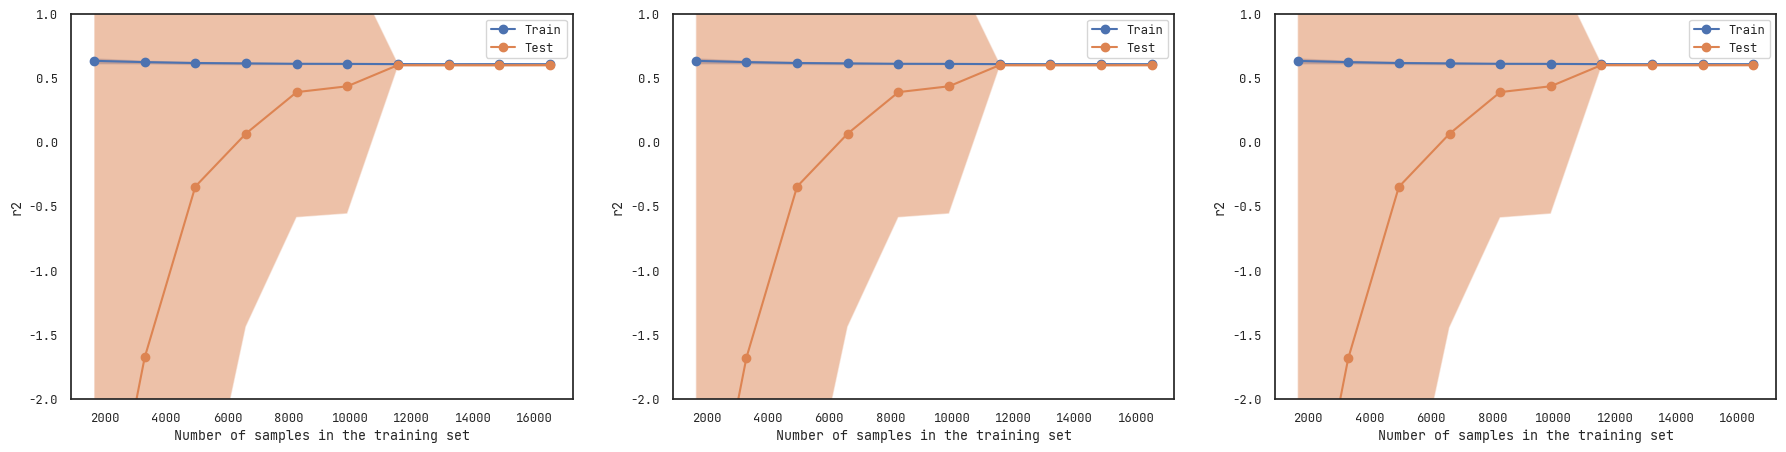

In [15]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "r2",
}

for ax_idx, estimator in enumerate(ridges):
    ax[ax_idx].set_ylim(-2, 1)
    LearningCurveDisplay.from_estimator(estimator=estimator, ax=ax[ax_idx], **common_params)